# HW 4 - Developing Neural Network Architectures

**Author**: Ewan Lister
Completed 05/08/2023

In this notebook we will use neural networks create fits for numeric data.

## I Reconsider the data from homework one:

    X=np.arange(0,31)
    Y=np.array([30, 35, 33, 32, 34, 37, 39, 38, 36, 36, 37, 39, 42, 45, 45, 41,
    40, 39, 42, 44, 47, 49, 50, 49, 46, 48, 50, 53, 55, 54, 53])

In [1]:
# imports
import torch
import torch.nn as nn
import torchvision.datasets as datasets
import torchvision.transforms as transforms
import scipy.io as sio
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso
from sklearn.decomposition import PCA
from scipy.io import loadmat
from sklearn.datasets import fetch_openml

X = torch.arange(0, 31, dtype=torch.float32).reshape(-1, 1)
Y = torch.tensor([30, 35, 33, 32, 34, 37, 39, 38, 36, 36, 37, 39, 42, 45, 45, 41,
                  40, 39, 42, 44, 47, 49, 50, 49, 46, 48, 50, 53, 55, 54, 53],
                 dtype=torch.float32).reshape(-1, 1)

data = dict(zip(X, Y))

### (i) Fit the data to a three layer feed forward neural network.

Epoch [1/9], Step [31/31], Loss: 4.3256
Epoch [2/9], Step [31/31], Loss: 4.2859
Epoch [3/9], Step [31/31], Loss: 4.2179
Epoch [4/9], Step [31/31], Loss: 4.1186
Epoch [5/9], Step [31/31], Loss: 3.9834
Epoch [6/9], Step [31/31], Loss: 3.8058
Epoch [7/9], Step [31/31], Loss: 3.5793
Epoch [8/9], Step [31/31], Loss: 3.3018
Epoch [9/9], Step [31/31], Loss: 2.9548


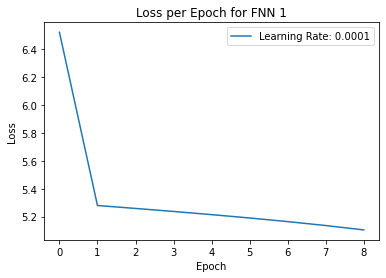

In [50]:
# Define the neural network architecture
class ThreeLayerNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(1, 10)  # input layer -> hidden layer
        self.fc2 = nn.Linear(10, 20) # hidden layer -> hidden layer
        self.fc3 = nn.Linear(20, 1)  # hidden layer -> output layer
        
    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# initialize network
net = ThreeLayerNet()

# make a forward pass with dummy data
x = torch.randn(1)
output = net(x)

# create a visualization
#vis_graph = make_dot(output, params=dict(net.named_parameters()))
#vis_graph.view()
w = 'white'
lr = 0.0001
# use SGD for fitting
optimizer = torch.optim.SGD(net.parameters(), lr=lr)

# loss function
criterion = nn.MSELoss()

# create training data loader
train_loader = torch.utils.data.DataLoader(dataset=data, batch_size=1, shuffle=True)

loss_values = []

# Train the neural network using gradient descent
num_epochs = 9

for epoch in range(num_epochs):
    running_loss = 0.0

    for i, (x) in enumerate(X):
        optimizer.zero_grad()
        outputs = net(x)
        loss = criterion(outputs, Y[i])
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

        if (i + 1) % 31 == 0:
            print('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}'.format(epoch+1, num_epochs, i+1, len(train_loader), loss.item()))

    epoch_loss = running_loss / len(train_loader)
    loss_values.append(epoch_loss)

# Plot the loss values with legend
plt.plot(np.log(loss_values), label='Learning Rate: {}'.format(lr))
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss per Epoch for FNN 1')
plt.legend()
plt.savefig('./Figures/fnnepochs.jpg', facecolor=w)
plt.show()

### (ii) Using the first 20 data points as training data, fit the neural network. Compute the least-square error for each of these over the training points. Then compute the least square error of these models on the test data which are the remaining 10 data points.

Epoch [1/20], Step [20/20], Loss: 18.7432
Epoch [2/20], Step [20/20], Loss: 20.3731
Epoch [3/20], Step [20/20], Loss: 20.8177
Epoch [4/20], Step [20/20], Loss: 20.9473
Epoch [5/20], Step [20/20], Loss: 20.9933
Epoch [6/20], Step [20/20], Loss: 21.0159
Epoch [7/20], Step [20/20], Loss: 21.0311
Epoch [8/20], Step [20/20], Loss: 21.0431
Epoch [9/20], Step [20/20], Loss: 21.0532
Epoch [10/20], Step [20/20], Loss: 21.0618
Epoch [11/20], Step [20/20], Loss: 21.0693
Epoch [12/20], Step [20/20], Loss: 21.0759
Epoch [13/20], Step [20/20], Loss: 21.0815
Epoch [14/20], Step [20/20], Loss: 21.0864
Epoch [15/20], Step [20/20], Loss: 21.0907
Epoch [16/20], Step [20/20], Loss: 21.0944
Epoch [17/20], Step [20/20], Loss: 21.0976
Epoch [18/20], Step [20/20], Loss: 21.1004
Epoch [19/20], Step [20/20], Loss: 21.1029
Epoch [20/20], Step [20/20], Loss: 21.1050


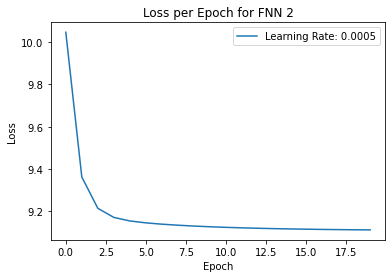

Train error for x = tensor([0.]), y = tensor([30.]) : 0.0031
Train error for x = tensor([1.]), y = tensor([35.]) : 22.2448
Train error for x = tensor([2.]), y = tensor([33.]) : 45.1105
Train error for x = tensor([3.]), y = tensor([32.]) : 59.5434
Train error for x = tensor([4.]), y = tensor([34.]) : 32.6776
Train error for x = tensor([5.]), y = tensor([37.]) : 7.3790
Train error for x = tensor([6.]), y = tensor([39.]) : 0.5133
Train error for x = tensor([7.]), y = tensor([38.]) : 2.9461
Train error for x = tensor([8.]), y = tensor([36.]) : 13.8119
Train error for x = tensor([9.]), y = tensor([36.]) : 13.8119
Train error for x = tensor([10.]), y = tensor([37.]) : 7.3790
Train error for x = tensor([11.]), y = tensor([39.]) : 0.5133
Train error for x = tensor([12.]), y = tensor([42.]) : 5.2147
Train error for x = tensor([13.]), y = tensor([45.]) : 27.9161
Train error for x = tensor([14.]), y = tensor([45.]) : 27.9161
Train error for x = tensor([15.]), y = tensor([41.]) : 1.6475
Train erro

In [64]:
def check_train_test_error(x_train, y_train, x_test, y_test):
    for i, (x) in enumerate(x_train):
        outputs = net(x)
        error = criterion(outputs, y_train[i])
        print('Train error for x = {}, y = {} : {:.4f}'.format(x, y_train[i], error))
    print('\n')
    for i, (x) in enumerate(x_test):
        outputs = net(x)
        error = criterion(outputs, y_test[i])
        print('Test error for x = {}, y = {} : {:.4f}'.format(x, y_test[i], error))

# isolate first 20 data points
x_train = X[0:20]
y_train = Y[0:20]
x_test = X[20:31]
y_test = Y[20:31]

loss_values = []
lr = 0.0005
optimizer = torch.optim.SGD(net.parameters(), lr=lr)


# train network on first 20 data points, examine progress of SGD via print statements
num_epochs = 20
for epoch in range(num_epochs):
    running_loss = 0.0
    for i, (x) in enumerate(x_train):
        optimizer.zero_grad()
        outputs = net(x)
        loss = criterion(outputs, y_train[i])
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        
        if (i + 1) % 20 == 0:
            print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}'.format(epoch+1, num_epochs, i+1, 20, loss.item()))
    epoch_loss = running_loss / len(train_loader)
    loss_values.append(epoch_loss)


# Plot the loss values with legend
plt.plot(loss_values, label='Learning Rate: {}'.format(lr))
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss per Epoch for FNN 2')
plt.legend()
plt.savefig('./Figures/fnnepochs2.jpg', facecolor=w)
plt.show()

check_train_test_error(x_train, y_train, x_test, y_test)

### (iii) Repeat (iii) but use the first 10 and last 10 data points as training data. Then fit the model to the test data (which are the 10 held out middle data points). Compare these results to (iii)

Epoch [1/20], Step [20/20], Loss: 2.1040
Epoch [2/20], Step [20/20], Loss: 2.1260
Epoch [3/20], Step [20/20], Loss: 2.1465
Epoch [4/20], Step [20/20], Loss: 2.1655
Epoch [5/20], Step [20/20], Loss: 2.1831
Epoch [6/20], Step [20/20], Loss: 2.1992
Epoch [7/20], Step [20/20], Loss: 2.2140
Epoch [8/20], Step [20/20], Loss: 2.2273
Epoch [9/20], Step [20/20], Loss: 2.2394
Epoch [10/20], Step [20/20], Loss: 2.2502
Epoch [11/20], Step [20/20], Loss: 2.2597
Epoch [12/20], Step [20/20], Loss: 2.2679
Epoch [13/20], Step [20/20], Loss: 2.2751
Epoch [14/20], Step [20/20], Loss: 2.2811
Epoch [15/20], Step [20/20], Loss: 2.2859
Epoch [16/20], Step [20/20], Loss: 2.2896
Epoch [17/20], Step [20/20], Loss: 2.2923
Epoch [18/20], Step [20/20], Loss: 2.2940
Epoch [19/20], Step [20/20], Loss: 2.2946
Epoch [20/20], Step [20/20], Loss: 2.2943


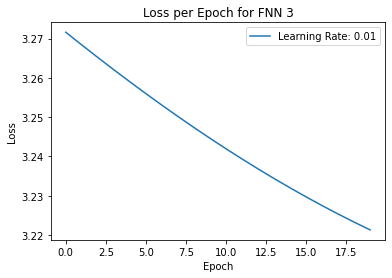

Train error for x = tensor([0.]), y = tensor([30.]) : 524.2375
Train error for x = tensor([1.]), y = tensor([35.]) : 320.2751
Train error for x = tensor([2.]), y = tensor([33.]) : 395.8601
Train error for x = tensor([3.]), y = tensor([32.]) : 436.6525
Train error for x = tensor([4.]), y = tensor([34.]) : 357.0676
Train error for x = tensor([5.]), y = tensor([37.]) : 252.6902
Train error for x = tensor([6.]), y = tensor([39.]) : 193.1053
Train error for x = tensor([7.]), y = tensor([38.]) : 221.8978
Train error for x = tensor([8.]), y = tensor([36.]) : 285.4827
Train error for x = tensor([9.]), y = tensor([36.]) : 285.4827
Train error for x = tensor([20.]), y = tensor([47.]) : 34.7656
Train error for x = tensor([21.]), y = tensor([49.]) : 15.1806
Train error for x = tensor([22.]), y = tensor([50.]) : 8.3882
Train error for x = tensor([23.]), y = tensor([49.]) : 15.1806
Train error for x = tensor([24.]), y = tensor([46.]) : 47.5580
Train error for x = tensor([25.]), y = tensor([48.]) : 2

In [74]:
# isolate first and last 10 training points
x_train = torch.cat([X[0:10], X[20:31]])
y_train = torch.cat([Y[0:10], Y[20:31]])
x_test = X[10:20]
y_test = Y[10:20]


loss_values = []
lr = 0.01
optimizer = torch.optim.SGD(net.parameters(), lr=lr)

# train network on first and last 10 data points, examine progress of SGD via print statements
num_epochs = 20
for epoch in range(num_epochs):
    running_loss = 0
    for i, (x) in enumerate(x_train):
        optimizer.zero_grad()
        outputs = net(x)
        loss = criterion(outputs, y_train[i])
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        
        if (i + 1) % 20 == 0:
            print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}'.format(epoch+1, num_epochs, i+1, 20, loss.item()))
    epoch_loss = running_loss / len(train_loader)
    loss_values.append(epoch_loss)

# Plot the loss values with legend
plt.plot(np.log(loss_values), label='Learning Rate: {}'.format(lr))
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss per Epoch for FNN 3')
plt.legend()
plt.savefig('./Figures/fnnepochs3.jpg', facecolor=w)
plt.show()

check_train_test_error(x_train, y_train, x_test, y_test)

### (iv) Compare the models fit in homework one to the neural networks in (ii) and (iii)

Similarly to the curve fitting in homework 1, the neural network does a poor job of making any extrapolations about its test data if the data is outside of the domain of the training data. For example, the network did well when test data contained the 10 points between point 9 and point 20, but poorly when the test data was that from 20 to 31, which is unbounded by any training data. Thus is performs very similarly to the curve fitting in homework 1. However, the loss, for each value is still much greater in the case of the neural network.


## II Now train a feedforward neural network on the MNIST data set. You will start by performing the following analysis:

### (i) Compute the first 20 PCA modes of the digit images.


In [75]:
# fetch MNIST dataset
mnist = fetch_openml('mnist_784', version=1)

# Convert the data and labels into numpy arrays
data = np.array(mnist['data'])
labels = np.array(mnist['target'])

# apply PCA transformation onto the first 20 modes
pca = PCA(n_components=20)

print(np.shape(data))
data_pca_1 = pca.fit_transform(data)

(70000, 784)


In [76]:
from sklearn.model_selection import train_test_split
print(np.shape(data_pca_1))
print(np.shape(labels))

(70000, 20)
(70000,)



### (ii) Build a feed-forward neural network to classify the digits. Compare the results of the neural network against LSTM, SVM (support vector machines) and decision tree classifiers.

In [77]:
# separate training and test data for use in LSTM, SVM, and DTC classifiers
data_train, data_test, label_train, label_test = train_test_split(data_pca_1, labels, test_size=0.3, random_state=42)

# convert labels to ints
label_train = label_train.astype(np.int16)
label_test = label_test.astype(np.int16)

### testing neural network on MNIST data

In [91]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms

# Define the hyperparameters
batch_size = 128
loss_values = []
lr = 0.01
num_epochs = 10

# Download and prepare the MNIST dataset
train_dataset = datasets.MNIST(root='./data', train=True, transform=transforms.ToTensor(), download=True)
test_dataset = datasets.MNIST(root='./data', train=False, transform=transforms.ToTensor())

# Create data loaders for the training and testing datasets
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# Define the model architecture
class FeedforwardNN(nn.Module):
    def __init__(self):
        super(FeedforwardNN, self).__init__()
        self.fc1 = nn.Linear(784, 256)
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128, 10)
        
    def forward(self, x):
        x = x.view(-1, 784)
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# Initialize the model and optimizer
model = FeedforwardNN()
optimizer = optim.Adam(model.parameters(), lr=lr)

# Train the model
for epoch in range(num_epochs):
    running_loss = 0
    for batch_idx, (data, target) in enumerate(train_loader):
        optimizer.zero_grad()
        output = model(data)
        loss = nn.CrossEntropyLoss()(output, target)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
        if (batch_idx + 1) % 200 == 0:
            print('Epoch {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_idx * len(data), len(train_loader.dataset),
                100. * batch_idx / len(train_loader), loss.item()))
    epoch_loss = running_loss / len(train_loader)
    loss_values.append(epoch_loss)



Epoch 0 [25472/60000 (42%)]	Loss: 0.121338
Epoch 0 [51072/60000 (85%)]	Loss: 0.196303
Epoch 1 [25472/60000 (42%)]	Loss: 0.153338
Epoch 1 [51072/60000 (85%)]	Loss: 0.270683
Epoch 2 [25472/60000 (42%)]	Loss: 0.131280
Epoch 2 [51072/60000 (85%)]	Loss: 0.251824
Epoch 3 [25472/60000 (42%)]	Loss: 0.091827
Epoch 3 [51072/60000 (85%)]	Loss: 0.057270
Epoch 4 [25472/60000 (42%)]	Loss: 0.039609
Epoch 4 [51072/60000 (85%)]	Loss: 0.067414
Epoch 5 [25472/60000 (42%)]	Loss: 0.018008
Epoch 5 [51072/60000 (85%)]	Loss: 0.098646
Epoch 6 [25472/60000 (42%)]	Loss: 0.024843
Epoch 6 [51072/60000 (85%)]	Loss: 0.047225
Epoch 7 [25472/60000 (42%)]	Loss: 0.034803
Epoch 7 [51072/60000 (85%)]	Loss: 0.064765
Epoch 8 [25472/60000 (42%)]	Loss: 0.064595
Epoch 8 [51072/60000 (85%)]	Loss: 0.059254
Epoch 9 [25472/60000 (42%)]	Loss: 0.058160
Epoch 9 [51072/60000 (85%)]	Loss: 0.098641


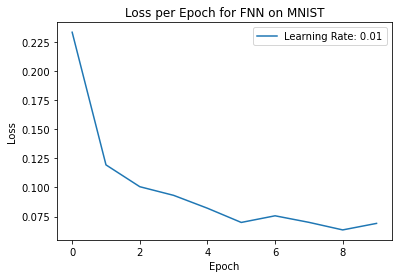

Test set: Average loss: 0.0013, Accuracy: 9672/10000 (97%)


In [86]:
# Plot the loss values with legend
plt.plot(loss_values, label='Learning Rate: {}'.format(lr))
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss per Epoch for FNN on MNIST')
plt.legend()
plt.savefig('./Figures/fnnMNIST1.jpg', facecolor=w)
plt.show()   

# Evaluate the model on the test set
test_loss = 0
correct = 0
with torch.no_grad():
    for data, target in test_loader:
        output = model(data)
        test_loss += nn.CrossEntropyLoss()(output, target).item()
        pred = output.argmax(dim=1, keepdim=True)
        correct += pred.eq(target.view_as(pred)).sum().item()

test_loss /= len(test_loader.dataset)
accuracy = 100. * correct / len(test_loader.dataset)
print('Test set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)'.format(
    test_loss, correct, len(test_loader.dataset), accuracy))

### testing LSTM on MNIST data

In [89]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms

# Define the hyperparameters
batch_size = 128
num_epochs = 10
hidden_size = 64
num_layers = 2

# Define the hyperparameters
loss_values = []
lr = 0.01

# Download and prepare the MNIST dataset
train_dataset = datasets.MNIST(root='./data', train=True, transform=transforms.ToTensor(), download=True)
test_dataset = datasets.MNIST(root='./data', train=False, transform=transforms.ToTensor())

# Create data loaders for the training and testing datasets
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# Define the LSTM architecture
class LSTM(nn.Module):
    def __init__(self):
        super(LSTM, self).__init__()
        self.lstm = nn.LSTM(input_size=28, hidden_size=hidden_size, num_layers=num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, 10)
        
    def forward(self, x):
        h0 = torch.zeros(num_layers, x.size(0), hidden_size).to(x.device)
        c0 = torch.zeros(num_layers, x.size(0), hidden_size).to(x.device)
        out, (h_n, c_n) = self.lstm(x, (h0, c0))
        out = self.fc(h_n[-1])
        return out

# Initialize the model and optimizer
model = LSTM()
optimizer = optim.Adam(model.parameters(), lr=lr)

# Train the model
for epoch in range(num_epochs):
    running_loss = 0
    for batch_idx, (data, target) in enumerate(train_loader):
        optimizer.zero_grad()
        data = data = data.view(data.shape[0], 28, 28)
        output = model(data)
        loss = nn.CrossEntropyLoss()(output, target)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()

        if (batch_idx + 1) % 200 == 0:
            print('Epoch {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_idx * len(data), len(train_loader.dataset),
                100. * batch_idx / len(train_loader), loss.item()))
    epoch_loss = running_loss / len(train_loader)
    loss_values.append(epoch_loss)



Epoch 0 [25472/60000 (42%)]	Loss: 0.170353
Epoch 0 [51072/60000 (85%)]	Loss: 0.221762
Epoch 1 [25472/60000 (42%)]	Loss: 0.145798
Epoch 1 [51072/60000 (85%)]	Loss: 0.175868
Epoch 2 [25472/60000 (42%)]	Loss: 0.092263
Epoch 2 [51072/60000 (85%)]	Loss: 0.040271
Epoch 3 [25472/60000 (42%)]	Loss: 0.043687
Epoch 3 [51072/60000 (85%)]	Loss: 0.019803
Epoch 4 [25472/60000 (42%)]	Loss: 0.050533
Epoch 4 [51072/60000 (85%)]	Loss: 0.004677
Epoch 5 [25472/60000 (42%)]	Loss: 0.023416
Epoch 5 [51072/60000 (85%)]	Loss: 0.026353
Epoch 6 [25472/60000 (42%)]	Loss: 0.014642
Epoch 6 [51072/60000 (85%)]	Loss: 0.006110
Epoch 7 [25472/60000 (42%)]	Loss: 0.027255
Epoch 7 [51072/60000 (85%)]	Loss: 0.081340
Epoch 8 [25472/60000 (42%)]	Loss: 0.023404
Epoch 8 [51072/60000 (85%)]	Loss: 0.024893
Epoch 9 [25472/60000 (42%)]	Loss: 0.026854
Epoch 9 [51072/60000 (85%)]	Loss: 0.017468


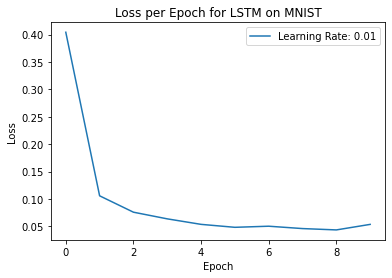

Test set: Average loss: 0.0005, Accuracy: 9797/10000 (98%)


In [90]:

# Plot the loss values with legend
plt.plot(loss_values, label='Learning Rate: {}'.format(lr))
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss per Epoch for LSTM on MNIST')
plt.legend()
plt.savefig('./Figures/lstmMNIST1.jpg', facecolor=w)
plt.show()   

# Evaluate the model on the test set
test_loss = 0
correct = 0
with torch.no_grad():
    for data, target in test_loader:
        data = data.view(data.shape[0], 28, 28)
        output = model(data)
        test_loss += nn.CrossEntropyLoss()(output, target).item()
        pred = output.argmax(dim=1, keepdim=True)
        correct += pred.eq(target.view_as(pred)).sum().item()

test_loss /= len(test_loader.dataset)
accuracy = 100. * correct / len(test_loader.dataset)
print('Test set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)'.format(
    test_loss, correct, len(test_loader.dataset), accuracy))


### fitting an SVM classifier

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
# Train a linear classifier
clf = SVC()
clf.fit(data_train, label_train)

# Evaluate the performance on the test set
y_pred = clf.predict(data_test)
acc = accuracy_score(label_test, y_pred)
print(f"Accuracy for SVM: {acc:.2f}")

Accuracy for SVM: 0.97


### fitting a DTC classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Train a DTC classifier
clf = DecisionTreeClassifier()
clf.fit(data_train, label_train)

# Evaluate the performance on the test set
y_pred = clf.predict(data_test)
acc = accuracy_score(label_test, y_pred)
print(f"Accuracy for DTC: {acc:.2f}")

Accuracy for DTC: 0.84
